## <b> $\color{red}{\text{Section 1: Table of content}}$   </b>




###  $\;\;$ Section 1: Table of content
### $\;\;$  Section 2: Import necessary libraries

#  $\;$ ----------------$\;\;$ Part 1: Climate Aspects $\;\;$ ----------------

###  $\;\;$ Section 3: Data preparation 
#### $\;\;\;\;$ 3.1 Importing initial data from external sources
#### $\;\;\;\;$ 3.2 Export data frames to csv file ( or excel), to manipulate manually
#### $\;\;\;\;$ 3.3 Manipulating tables in excel.
#### $\;\;\;\;$ 3.4 Getting the clean data table from csv file. ( final result of manipulation in MS.Excel)
###  $\;\;$ Section 4: Explore data
#### $\;\;\;\;$ 4.1 Data frame general information
#### $\;\;\;\;$ 4.2 Visualization of cities coordinate on map



## Phase I: Clustering regarding climate 

### $\;\;$  Section 5: Clustering
#### $\;\;\;\;$ 5.1 Let check again our dataframe to find out which columns are not appropriate to our clustering
#### $\;\;\;\;$ 5.2 Before clustering we must normalize data
#### $\;\;\;\;$ 5.3 Applying K-Mean method
#### $\;\;\;\;\;\;$ 5.3.1 Split data set to test and train sets
#### $\;\;\;\;\;\;$ 5.3.2 Calculate  errors/scores for clustering with different k:
#### $\;\;\;\;\;\;\;\;$ 5.3.2.1 Calculate  error/scores
#### $\;\;\;\;\;\;\;\;$ 5.3.2.2 Tracing  SSE for different k value
#### $\;\;\;\;\;\;\;\;$ 5.3.2.3 Finding the best k
#### $\;\;\;\;$ 5.4 Visualization
#### $\;\;\;\;\;\;$ 5.4.1 Define df_clustered as original dataframe concatenated with cluster for k=8
#### $\;\;\;\;\;\;$ 5.4.2 Add color code to df_clustered
#### $\;\;\;\;\;\;$ 5.4.3 Visualization  on map


## Phase II: Predictability 

###  $\;\;$ Section 6: Regression
#### $\;\;\;\;$ 6.1 Cleaning data
#### $\;\;\;\;$ 6.2 Regression models
#### $\;\;\;\;\;\;$ 6.2.1 'Annual DegreeC -LowAverage'
#### $\;\;\;\;\;\;$ 6.2.2 Forecast  of 'Frost-free days'



# $\;$ -------------$\;\;$ Part 2: FourSquare Venues Aspects $\;\;$ -------------

## Phase III:  Define life comfort indicator and Clustering regarding FourSquare venues 

### $\;\;$  Section 7: Clustering regarding top venues
#### $\;\;\;\;$ 7.1 Find a life style indicator
#### $\;\;\;\;$ 7.2 Clustering cities by top important Venues
###  $\;\;$ Section 8: Result resume and Conclusion 
#### $\;\;\;\;$ 8.1 Prepare abstract matrix
#### $\;\;\;\;$ 8.2 Conclusion


## <b> $\color{red}{\text{Section 2: Import necessary libraries}}$   </b>
 

In [428]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

In [3]:
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install folium
import folium # map rendering library


distributed 1.21.8 requires msgpack, which is not installed.
cryptography 3.3.1 has requirement cffi>=1.12, but you'll have cffi 1.11.5 which is incompatible.
You are using pip version 10.0.1, however version 20.3.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


distributed 1.21.8 requires msgpack, which is not installed.
cryptography 3.3.1 has requirement cffi>=1.12, but you'll have cffi 1.11.5 which is incompatible.
You are using pip version 10.0.1, however version 20.3.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import jaccard_similarity_score
import collections

In [6]:
!pip install kneed
# or «!conda install -c conda-forge kneed»
from kneed import KneeLocator

distributed 1.21.8 requires msgpack, which is not installed.
cryptography 3.3.1 has requirement cffi>=1.12, but you'll have cffi 1.11.5 which is incompatible.
You are using pip version 10.0.1, however version 20.3.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


# <b> $\color{brown}{\text{Part 1: Climate Aspects }}$   </b>

## <b> $\color{red}{\text{Section 3: Data preperation }}$   </b>


### 3.1 Importing initial data from external sources

In [8]:
url = 'https://en.wikipedia.org/wiki/Temperature_in_Canada'
df_Temperature_Average = pd.read_html(url, attrs={"class": "wikitable"})[0] # 0 is for the 1st table in this particular page
df_HotColdFrost_Avergae = pd.read_html(url, attrs={"class": "wikitable"})[1] # 0 is for the 1st table in this particular page
df_Temperature_Extremes = pd.read_html(url, attrs={"class": "wikitable"})[2] # 0 is for the 1st table in this particular page
#df_TNeib.head()

In [9]:
df_Temperature_Average.head()

,0,1,2,3,4,5,6,7,8,9
0,Community,Weather station,Location,Elevation,January(Avg. high °C (°F)),January(Avg. low °C (°F)),July(Avg. high °C (°F)),July(Avg. low °C (°F)),Annual(Avg. high °C (°F)),Annual(Avg. low °C (°F))
1,"Alberton, PE[7]",NaN,".mw-parser-output .geo-default,.mw-parser-outp...",3 m (9.8 ft),−3.9 (25.0),−12.5 (9.5),23.2 (73.8),14.1 (57.4),9.6 (49.3),1.3 (34.3)
2,"Baker Lake, NU[8]",YBK,64°17′56″N 096°04′40″W﻿ / ﻿64.29889°N 96.07778°W,18.6 m (61 ft),−27.7 (−17.9),−34.8 (−30.6),17.0 (62.6),6.1 (43.0),−7.3 (18.9),−15.2 (4.6)
3,"Baie-Comeau, QC[9]",YBC,49°08′00″N 068°12′00″W﻿ / ﻿49.13333°N 68.20000°W,22 m (72 ft),−8.7 (16.3),−19.9 (−3.8),20.9 (69.6),10.3 (50.5),6.6 (43.9),−3.3 (26.1)
4,"Calgary, AB[10]",YYC,51°06′50″N 114°01′13″W﻿ / ﻿51.11389°N 114.02028°W,"1,084 m (3,556 ft)",−0.9 (30.4),−13.2 (8.2),23.2 (73.8),9.8 (49.6),10.8 (51.4),−1.9 (28.6)


In [10]:
df_HotColdFrost_Avergae.head()

,0,1,2,3,4,5,6,7,8,9,10
0,Location,Region,Days >30°,Days >20°,Frosts,Max temp <0°,Days <-10°,Days <–20°,First frost,Last frost,Frost-free
1,Baker Lake,NU,0.21,13.1,270.5,225.5,206.3,158.2,Aug 30,Jun 25,65 days
2,Brandon,MB,15.9,109.8,202.3,110.0,108.6,52.6,Sep 14,May 24,112 days
3,Calgary,AB,5.1,87.2,194.4,59.3,71.3,21.7,Sep 16,May 21,117 days
4,Charlottetown,PE,0.9,79.3,160.2,72.6,54.6,6.5,Oct 17,May 16,153 days


In [11]:
df_Temperature_Extremes.head()

,0,1,2,3,4,5,6,7,8,9
0,Community,Weather station,Location,Elevation,January(Record high °C (°F)),January(Record low °C (°F)),July(Record high °C (°F)),July(Record low °C (°F)),Annual(Extreme high °C (°F)),Annual(Extreme low °C (°F))
1,"Alberton, PE[7]",NaN,46°51′00″N 064°01′00″W﻿ / ﻿46.85000°N 64.01667°W,3 m (9.8 ft),13.2 (55.8),−31.7 (−25.1),33.0 (91.4),3.0 (37.4),33.3 (91.9),−33.0 (−27.4)
2,"Alert, NU[52][53]",YLT,82°30′05″N 62°20′20″W﻿ / ﻿82.50139°N 62.33889°W,30.5 m (100 ft),0.0 (32.0),−50.0 (−58.0),20.0 (68.0),−6.3 (20.7),20.0 (68.0),−50.0 (−58.0)
3,"Baker Lake, NU",YBK,64°17′56″N 096°04′40″W﻿ / ﻿64.29889°N 96.07778°W,18.6 m (61 ft),−27.7 (−17.9),−50.6 (−59.1),33.6 (92.5),−1.7 (28.9),33.6 (92.5),−50.6 (−59.1)
4,"Baie-Comeau, QC[9]",YBC,49°08′00″N 068°12′00″W﻿ / ﻿49.13333°N 68.20000°W,22 m (72 ft),11.4 (52.5),−47.2 (−53.0),32.8 (91.0),0.6 (33.1),32.8 (91.0),−47.2 (−53.0)


### 3.2 Export data frames to csv file ( or excel), to manipulate manually
 

<p style='margin-top:0in;margin-right:0in;margin-bottom:.0001pt;margin-left:0in;line-height:normal;font-size:15px;font-family:"Calibri","sans-serif";'><span style='font-size:18px;font-family:"Times New Roman","serif";color:black;'>We need to manipulate data of these three table to :</span></p>
<p style='margin-top:0in;margin-right:0in;margin-bottom:.0001pt;margin-left:.5in;line-height:normal;font-size:15px;font-family:"Calibri","sans-serif";'><span style='font-size:18px;font-family:"Times New Roman","serif";color:black;'>&nbsp; 1. Combine three table with the cities as the key</span></p>
<p style='margin-top:0in;margin-right:0in;margin-bottom:.0001pt;margin-left:.5in;line-height:normal;font-size:15px;font-family:"Calibri","sans-serif";'><span style='font-size:18px;font-family:"Times New Roman","serif";color:black;'>&nbsp; 2. Removed un complete rows that means if a city is not repeated in all the three table</span></p>
<p style='margin-top:0in;margin-right:0in;margin-bottom:.0001pt;margin-left:.5in;line-height:normal;font-size:15px;font-family:"Calibri","sans-serif";'><span style='font-size:18px;font-family:"Times New Roman","serif";color:black;'>&nbsp; 3. Remove unusable part of information from cells like : &laquo;[10]&raquo; from &laquo;Calgary, AB[10]&raquo;</span></p>
<p style='margin-top:0in;margin-right:0in;margin-bottom:.0001pt;margin-left:.5in;line-height:normal;font-size:15px;font-family:"Calibri","sans-serif";'><span style='font-size:18px;font-family:"Times New Roman","serif";color:black;'>&nbsp; 4. Seperate mixed information like : &laquo;3 m (9.8 ft)&raquo; to &laquo;3&raquo; and &laquo;9.8&raquo; in two new columns</span></p>
<p style='margin-top:0in;margin-right:0in;margin-bottom:.0001pt;margin-left:.5in;line-height:normal;font-size:15px;font-family:"Calibri","sans-serif";'><span style='font-size:18px;font-family:"Times New Roman","serif";color:black;'>&nbsp; 5. extrct numeric information from text like : &laquo;112&raquo; from &laquo;112 days&raquo;</span></p>
<p style='margin-top:0in;margin-right:0in;margin-bottom:.0001pt;margin-left:0in;line-height:normal;font-size:15px;font-family:"Calibri","sans-serif";'><span style='font-size:18px;font-family:"Times New Roman","serif";color:black;'>As our tables are not big and number of changes are considerable comparing the size of tables, it is much more easier and faster that we send tables to MS-Excel and manipulate data in this envoronment.</span></p>
<p style='margin-top:0in;margin-right:0in;margin-bottom:.0001pt;margin-left:.5in;line-height:normal;font-size:15px;font-family:"Calibri","sans-serif";'><span style='font-size:18px;font-family:"Times New Roman","serif";color:black;'>&nbsp; So the final integretaed table which we are going to use for our analyse will be import from GitHub. here is all explained step by step:</span></p>
<p style='margin-top:0in;margin-right:0in;margin-bottom:10.0pt;margin-left:0in;line-height:115%;font-size:15px;font-family:"Calibri","sans-serif";'>&nbsp;</p>

In [12]:
# df_Temperature_Average.to_csv(r'C:\B_GitHub_Local_Files\df_Temperature_Average.csv',index=False)

In [13]:
# df_HotColdFrost_Avergae.to_csv(r'C:\B_GitHub_Local_Files\df_HotColdFrost_Avergae.csv',index=False)

In [14]:
# df_Temperature_Extremes.to_csv(r'C:\B_GitHub_Local_Files\df_Temperature_Extremes.csv',index=False)

### 3.3  Manupulating tables in excel. 
 Here is the final excel file of tables manipulation. We will not use this version it just for referenec. <br> It is showing clearly all steps done,  including all formule and middle pages 

#### https://github.com/babakkz/Capstone_Coursera/tree/master
#### file name is : CanadaTemperature.xlsx

### 3.4 Getting the clean data table from csv file. ( final result of manipulation in MS.Excel)

In [15]:
# to simplify coding we are going to name df_CanadaTemperatureCleanData  as  just df
df = pd.read_csv('https://raw.githubusercontent.com/babakkz/Capstone_Coursera/master/CanadaTemperatureCleanData.csv',index_col=0)
#https://github.com/babakkz/Capstone_Coursera/tree/master

In [16]:
df = df.reset_index()
df.head()

,Location,Region,Weather station,Latitude (N),Longitude (W),Elevation (m),January DegreeC -LowRecord,January DegreeC -LowAverage,January DegreeC -HighAverage,January DegreeC -HighRecord,...,Annual DegreeC -LowAverage,Annual DegreeC -HighAverage,Annual DegreeC -HighRecord,Days >30Degree,Days >20Degree,Frosts,Max temp <0Degree,Days <-10Degree,Days <?20Degree,Frost-free days
0,Baker Lake,NU,YBK,64.29889,-96.07778,19,-50.6,-34.8,-27.7,-27.7,...,-15.2,-7.3,33.6,0.2,13.1,270.5,225.5,206.3,158.2,65
1,Calgary,AB,YYC,51.11389,-114.02028,1084,-44.4,-13.2,-0.9,17.6,...,-1.9,10.8,36.1,5.1,87.2,194.4,59.3,71.3,21.7,117
2,Charlottetown,PE,YYG,46.28861,-63.12861,49,-30.5,-12.1,-3.4,15.1,...,1.3,9.9,34.4,0.9,79.3,160.2,72.6,54.6,6.5,153
3,Churchill,MB,YYQ,58.73917,-94.06639,29,-45.0,-30.1,-21.9,1.7,...,-10.7,-2.3,36.9,1.1,28.0,247.5,193.7,171.0,117.2,87
4,Dawson Creek,BC,YDA,64.04306,-139.12778,370,-53.8,-30.1,-21.8,9.7,...,-10.3,2.1,34.7,2.6,62.1,243.7,156.9,162.4,104.1,70


## <b> $\color{red}{\text{Section 4: Explore data}}$   </b>


### 4.1 Data frame general information

In [17]:
print(" Data frame of «CanadaTemperatureCleanData» (df) has %d columns and %d rows " 
      %(df.shape[0],df.shape[1]))
print (" The number of provinces is",len(df['Region'].unique()))
print (" The number of cities is",len(df['Location'].unique()))
print (" The number of Weather station is",len(df['Weather station'].unique()))
print(df.dtypes)

 Data frame of «CanadaTemperatureCleanData» (df) has 30 columns and 25 rows 
 The number of provinces is 13
 The number of cities is 30
 The number of Weather station is 30
Location                          object
Region                            object
Weather station                   object
Latitude (N)                     float64
Longitude (W)                    float64
Elevation (m)                      int64
January DegreeC  -LowRecord      float64
January DegreeC  -LowAverage     float64
January DegreeC  -HighAverage    float64
January DegreeC -HighRecord      float64
July DegreeC -LowRecord          float64
July DegreeC  -LowAverage        float64
July DegreeC -HighAverage        float64
July DegreeC -HighRecord         float64
Annual DegreeC -LowRecord        float64
Annual DegreeC  -LowAverage      float64
Annual DegreeC -HighAverage      float64
Annual DegreeC -HighRecord       float64
Days >30Degree                   float64
Days >20Degree                   float64
Frosts 

#### We just need the numeric information for statistics so no need to df.describe(include=all)

In [18]:
df.describe() 

,Latitude (N),Longitude (W),Elevation (m),January DegreeC -LowRecord,January DegreeC -LowAverage,January DegreeC -HighAverage,January DegreeC -HighRecord,July DegreeC -LowRecord,July DegreeC -LowAverage,July DegreeC -HighAverage,...,Annual DegreeC -LowAverage,Annual DegreeC -HighAverage,Annual DegreeC -HighRecord,Days >30Degree,Days >20Degree,Frosts,Max temp <0Degree,Days <-10Degree,Days <?20Degree,Frost-free days
count,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,51.754547,-92.334056,241.10000,-38.820000,-17.040000,-8.276667,10.810000,1.316667,11.460000,22.856667,...,-2.390000,7.616667,36.053333,5.876667,77.196667,179.666667,97.726667,87.123333,42.930000,132.033333
std,6.894100,25.816939,272.14643,11.229407,9.498152,9.109437,8.423135,3.067301,3.264184,3.582590,...,5.706339,5.741926,3.483432,6.820946,34.023780,56.962803,57.778023,57.254475,45.953914,44.628337
min,42.275560,-139.127780,4.00000,-53.800000,-34.800000,-27.700000,-27.700000,-3.300000,4.100000,12.300000,...,-15.200000,-7.300000,26.100000,0.000000,2.100000,40.900000,2.000000,0.400000,0.000000,65.000000
25%,46.120628,-114.335280,37.75000,-49.275000,-23.850000,-14.625000,9.775000,-1.100000,9.575000,21.525000,...,-6.450000,5.125000,34.400000,0.900000,58.050000,156.225000,59.475000,36.975000,3.625000,101.250000
50%,49.692365,-95.072085,143.00000,-40.250000,-14.900000,-5.900000,13.100000,1.100000,12.100000,23.150000,...,-0.900000,9.300000,36.200000,3.000000,78.550000,178.750000,80.050000,73.950000,23.150000,125.500000
75%,58.103543,-67.033335,362.00000,-30.700000,-9.800000,-1.325000,15.250000,3.900000,13.500000,25.450000,...,1.400000,11.300000,37.550000,9.225000,104.075000,223.700000,135.625000,135.850000,75.450000,157.500000
max,64.298890,-52.742780,1084.00000,-15.600000,1.500000,7.600000,17.800000,6.700000,17.900000,28.100000,...,6.800000,14.400000,43.300000,24.200000,138.900000,270.500000,225.500000,206.300000,158.200000,236.000000


#### Just as a question of curiosity before continuing:
#### Which are the warmest cities of Canada? 
#### we are going to mae some new tables

In [19]:
df_JanuaryLowRecord = df[['Location','Region','January DegreeC  -LowRecord'] ].sort_values(by='January DegreeC  -LowRecord', ascending=False)
df_JanuaryLowRecord.rename(columns={'Location':'Location-2','Region':'Region-2'}, inplace= True)
#df_JanuaryLowRecord.to_csv(r'C:\B_GitHub_Local_Files\df_JanuaryLowRecord.csv',index=False)
print(df_JanuaryLowRecord.head(3))

df_JanuaryLowAverage = df[['Location','Region','January DegreeC  -LowAverage'] ].sort_values(by='January DegreeC  -LowAverage', ascending=False)
df_JanuaryLowAverage.rename(columns={'Location':'Location-3','Region':'Region-3'}, inplace= True)
#df_JanuaryLowAverage.to_csv(r'C:\B_GitHub_Local_Files\df_JanuaryLowAverage.csv',index=False)
print(df_JanuaryLowAverage.head(3))

df_JulyHighAverage = df[['Location','Region','July DegreeC -HighAverage'] ].sort_values(by='July DegreeC -HighAverage', ascending=False)
df_JulyHighAverage.rename(columns={'Location':'Location-4','Region':'Region-4'}, inplace= True)
#df_JulyHighAverage.to_csv(r'C:\B_GitHub_Local_Files\df_JulyHighAverage.csv',index=False)
print(df_JulyHighAverage.head(3))

df_Frostfreedays = df[['Location','Region','Frost-free days'] ].sort_values(by='Frost-free days', ascending=False)
df_Frostfreedays.rename(columns={'Location':'Location-5','Region':'Region-5'}, inplace= True)
#df_Frostfreedays.to_csv(r'C:\B_GitHub_Local_Files\df_Frostfreedays.csv',index=False)
print(df_Frostfreedays.head(3))

df_elevation = df[['Location','Region','Elevation (m)'] ].sort_values(by='Elevation (m)', ascending=True)
df_elevation.rename(columns={'Location':'Location-1','Region':'Region-1'}, inplace= True)
#df_elevation.to_csv(r'C:\B_GitHub_Local_Files\df_elevation.csv',index=False)
print(df_elevation.head(3))



   Location-2 Region-2  January DegreeC  -LowRecord
24   Victoria       BC                        -15.6
23  Vancouver       BC                        -17.8
28   Yarmouth       NS                        -21.3
   Location-3 Region-3  January DegreeC  -LowAverage
24   Victoria       BC                           1.5
23  Vancouver       BC                           1.4
28   Yarmouth       NS                          -6.9
   Location-4 Region-4  July DegreeC -HighAverage
26    Windsor       ON                       28.1
22    Toronto       ON                       27.1
14     Ottawa       ON                       26.5
   Location-5 Region-5  Frost-free days
23  Vancouver       BC              236
24   Victoria       BC              211
22    Toronto       ON              203
    Location-1 Region-1  Elevation (m)
23   Vancouver       BC              4
13        Nain       NL              6
0   Baker Lake       NU             19


### 4.2 Visualisation of cities coordinate on map

[
import matplotlib.cm as cm
import matplotlib.colors as colors
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install folium
import folium # map rendering library
]

In [20]:
address = 'Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

# create map  using latitude and longitude values
map_ = folium.Map(location=[latitude, longitude], zoom_start=3)

# add markers to map
for lat, lng, region, WeatherStation, city in zip(df['Latitude (N)'], df['Longitude (W)'],  df['Region'], df['Weather station'],df['Location']):
    label = '{}, {}, {}'.format(city, region, WeatherStation)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color= 'black' ,
        fill=True,
        fill_color = 'red' , 
        fill_opacity=0.7,
        parse_html=False).add_to(map_)  
        
map_

The geograpical coordinate of Toronto are 61.0666922, -107.9917071.


[from sklearn.cluster import KMeans 
import collections
]

<br>
<li><b>Phase I----Clustering: </b>we are trying to cluster a limited list of cities of Canada regarding some historical weather information.</li>
<li><b>Phase II--- Regression:</b> we will find out if we could assign a new unknown city to a climatic zone just by having its geographic coordinates.</li>
<li><b>Phase III-- new indicator by FourSquar and clustering regarding venues: </b>as our objective is an estimation of life comfort accessories in each city, we are going to add an indicator of service accessibility.  For example number of coffee or restaurant could reflect job and service accessibility like hospitals, hotels, governmental services, schools etc. of course we could use directly all of mentioned area instead of indicator if the objective was a profound analyze. </li>
</br>

# <b> $\color{green}{\text{Phase I: }}$   </b> 
### <b> $\color{lightgreen}{\text{Clustering regarding climate }}$   </b>


## <b> $\color{red}{\text{Section 5: Clustering}}$   </b>

### 5.1 Let check again our dataframe to find out which columns are not approprate to our clustering 
<div class="alert alert-block alert-warning">

<ul>
    <li>we have no categorical information which has need to convert to categorie number</li>
    <li>the string columns has no use ( no effect ) on clustering </li>
    <li>latitude and longitude could be used but they are not meanningfull information for clustering we will use them in the nextstep for  another reasons </li>
    <li>Elevation is give us more bias than helping to clustering considerng temperatur </li>
  
</ul>
as an abstract we are going to drop 5 first column of our dataframe.
</div>

In [21]:
df.head(2)

,Location,Region,Weather station,Latitude (N),Longitude (W),Elevation (m),January DegreeC -LowRecord,January DegreeC -LowAverage,January DegreeC -HighAverage,January DegreeC -HighRecord,...,Annual DegreeC -LowAverage,Annual DegreeC -HighAverage,Annual DegreeC -HighRecord,Days >30Degree,Days >20Degree,Frosts,Max temp <0Degree,Days <-10Degree,Days <?20Degree,Frost-free days
0,Baker Lake,NU,YBK,64.29889,-96.07778,19,-50.6,-34.8,-27.7,-27.7,...,-15.2,-7.3,33.6,0.2,13.1,270.5,225.5,206.3,158.2,65
1,Calgary,AB,YYC,51.11389,-114.02028,1084,-44.4,-13.2,-0.9,17.6,...,-1.9,10.8,36.1,5.1,87.2,194.4,59.3,71.3,21.7,117


In [22]:
df_clustering = df.drop(df.columns[[0,1,2,3,4,5]], axis = 1) 
df_clustering.head()

,January DegreeC -LowRecord,January DegreeC -LowAverage,January DegreeC -HighAverage,January DegreeC -HighRecord,July DegreeC -LowRecord,July DegreeC -LowAverage,July DegreeC -HighAverage,July DegreeC -HighRecord,Annual DegreeC -LowRecord,Annual DegreeC -LowAverage,Annual DegreeC -HighAverage,Annual DegreeC -HighRecord,Days >30Degree,Days >20Degree,Frosts,Max temp <0Degree,Days <-10Degree,Days <?20Degree,Frost-free days
0,-50.6,-34.8,-27.7,-27.7,-1.7,6.1,17.0,33.6,-50.6,-15.2,-7.3,33.6,0.2,13.1,270.5,225.5,206.3,158.2,65
1,-44.4,-13.2,-0.9,17.6,-0.6,9.8,23.2,36.1,-45.0,-1.9,10.8,36.1,5.1,87.2,194.4,59.3,71.3,21.7,117
2,-30.5,-12.1,-3.4,15.1,3.3,14.1,23.3,33.9,-30.5,1.3,9.9,34.4,0.9,79.3,160.2,72.6,54.6,6.5,153
3,-45.0,-30.1,-21.9,1.7,1.1,7.3,18.0,34.0,-45.4,-10.7,-2.3,36.9,1.1,28.0,247.5,193.7,171.0,117.2,87
4,-53.8,-30.1,-21.8,9.7,-2.0,8.2,23.1,33.5,-55.8,-10.3,2.1,34.7,2.6,62.1,243.7,156.9,162.4,104.1,70


### 5.2  Before clustering we must normalize data

<div class="alert alert-block alert-warning">
<ul>
    <li>from sklearn import preprocessing</li>
    <li>from sklearn.neighbors import KNeighborsClassifier </li>
    <li>from sklearn import metrics</li>
    <li>from sklearn.metrics import silhouette_samples, silhouette_score </li>
  
</ul>

</div>


In [23]:
df_clustering = preprocessing.StandardScaler().fit(df_clustering).transform(df_clustering.astype(float))
df_clustering[0:5]

array([[-1.06696479, -1.90180271, -2.16867181, -4.65009017, -1.00030538,
        -1.67013585, -1.66270413, -0.51707015, -1.01143715, -2.28324835,
        -2.64226172, -0.71632621, -0.84646779, -1.91608388,  1.62186809,
         2.24925749,  2.11711   ,  2.5512641 , -1.52771286],
       [-0.50540437,  0.41120059,  0.82362634,  0.81989385, -0.63555314,
        -0.51724357,  0.09747213,  0.24332713, -0.50481389,  0.08733737,
         0.56387932,  0.01362577, -0.11581151,  0.29903623,  0.26306998,
        -0.67644371, -0.28109309, -0.46988234, -0.34261487],
       [ 0.75357785,  0.52899242,  0.54449405,  0.51801835,  0.65765934,
         0.82260423,  0.12586207, -0.42582248,  0.80697847,  0.65770386,
         0.40445794, -0.48274158, -0.74208832,  0.06287633, -0.34758567,
        -0.4423172 , -0.57775969, -0.80630304,  0.47783759],
       [-0.55974893, -1.39851033, -1.52108489, -1.10003431, -0.07184514,
        -1.29622484, -1.37880474, -0.39540658, -0.54100126, -1.48117048,
        -1.756

### 5.3 Applying K-Mean method



<div class="alert alert-block alert-warning">
<b> 5.3.1 </b> Split data set to test and train sets
<ul>
    <li>As we are facing just a clustering probleme in the case of unsupervised we dont need split because in fact there is no category model to refer. we could </li>
    <ul>
    <li>just do the clustering with variuos K on complete dataset and choose the one with less error, we could use elbow methode </li>
    <li>or choose a fix k .</li>
    </ul>
    
  
</ul>
I'm going to try the first one:
<ul>
    <b> 5.3.2 </b> calculate errors/scores for clustering with different k:
</ul>
<ul>
<b> 5.3.2.1 </b> calculate error/scores
</ul>
</div>


In [24]:
# set different k to make a clusters matrix
kclusters = 30

labelKmeans=pd.DataFrame([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
sse=[]
silhouette_coefficients = []
for n in range(2,kclusters-1):
    # run k-means clustering
    kmeans = KMeans(n_clusters=n, random_state=0).fit(df_clustering)

    x = kmeans.labels_
    x = np.sort(x)
    cName = str(n) # "Kc=" + str(n)
    labelKmeanstemp = pd.DataFrame(kmeans.labels_ , columns=[cName])
    labelKmeans = pd.concat([labelKmeans,labelKmeanstemp], axis=1, join='inner')
    score = silhouette_score(df_clustering, kmeans.labels_)
    #print(kmeans.inertia_)
    sse.append(kmeans.inertia_)
    silhouette_coefficients.append(score)
labelKmeans.drop(columns=0, axis=1, inplace=True)
print(" To be capble of using «Silhouette_coefficients» we must use k=2 to k=28 so \n there is 27 active columns for k")
print("\n \n labelKmeans (Labe for Clustering ) \n",labelKmeans)
print("\n \n SSE : \n \n",sse)
print("\n \n Silhouette_coefficients (SSE considering centroide distances too ) \n \n",silhouette_coefficients)


 To be capble of using «Silhouette_coefficients» we must use k=2 to k=28 so 
 there is 27 active columns for k

 
 labelKmeans (Labe for Clustering ) 
     2  3  4  5  6  7  8  9  10  11 ...  19  20  21  22  23  24  25  26  27  28
0   1  1  3  0  4  5  3  4   4   6 ...  10   4  10   6   6   6   6   5   6   6
1   0  0  0  2  5  1  2  1   0   8 ...   6  13   7   7   8  23  23  24  23  23
2   0  2  2  4  5  6  7  2   7   7 ...   3   7   8  10   9   9   9  20   9  27
3   1  1  1  3  1  2  3  0   1   9 ...   4  14   6  11  17  17  17  15  17  17
4   1  1  1  3  1  2  1  0   9   0 ...   8   1  11   2   5   5  24   2  24  24
5   0  0  0  2  5  1  2  1   0   8 ...   6  13   7   7   8   8   8  10   8   8
6   1  1  1  3  1  2  1  0   9   0 ...  11   8   4  18  18  18  18  12  18  18
7   0  0  0  1  5  1  2  1   0   2 ...  16   0  15  14  13  13  13   3  13  13
8   0  2  2  4  0  6  7  2   7   7 ...   3   7   8   0   2   2   2   1   2   2
9   1  1  1  3  1  2  1  0   9   0 ...  11   8   4  18  18

<b> 5.3.2.2 </b> tracing SSE for different k value
<Li>import matplotlib.pyplot as plt </Li>

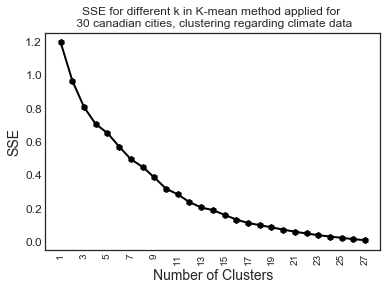

In [572]:
# https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
plt.style.use("seaborn-white")
plt.plot(range(1, kclusters-2), sse, color='black',linewidth=2, marker='h')
plt.xticks(range(1, kclusters-2,2),fontsize=10)
plt.yticks(fontsize=12)
plt.xlabel("Number of Clusters",fontsize=14)
plt.ylabel("SSE",fontsize=14)
plt.xticks(rotation=90)
plt.title("SSE for different k in K-mean method applied for \n 30 canadian cities, clustering regarding climate data")
plt.show()

<b> 5.3.2.3 </b> Finding the best k
<ul>We could estimate on graph that the elow is somewhere bethween 6 and 9 but as it is not clear , we use KneeLocator to find the best k </ul>
<Li>!pip install kneed </Li>
<Li># or «!conda install -c conda-forge kneed» </Li>
<Li>from kneed import KneeLocator</Li>

In [577]:
kl = KneeLocator(
   range(1, kclusters-2), sse, curve="convex", direction="decreasing"
    )

print("The elbow point is at k = ",kl.elbow)

The elbow point is at k =  12


### 5.4  Visualisation

<ul> <b>5.4.1 </b> define df_clustered as original dataframe  conctenated with cluster for k=8 </ul>


In [27]:
df_clustered  = pd.concat([df,pd.DataFrame(labelKmeans ['8'])], axis=1)
df_clustered.rename(columns={'8':'Cluster Number'}, inplace= True)
df_clustered.head()

,Location,Region,Weather station,Latitude (N),Longitude (W),Elevation (m),January DegreeC -LowRecord,January DegreeC -LowAverage,January DegreeC -HighAverage,January DegreeC -HighRecord,...,Annual DegreeC -HighAverage,Annual DegreeC -HighRecord,Days >30Degree,Days >20Degree,Frosts,Max temp <0Degree,Days <-10Degree,Days <?20Degree,Frost-free days,Cluster Number
0,Baker Lake,NU,YBK,64.29889,-96.07778,19,-50.6,-34.8,-27.7,-27.7,...,-7.3,33.6,0.2,13.1,270.5,225.5,206.3,158.2,65,3
1,Calgary,AB,YYC,51.11389,-114.02028,1084,-44.4,-13.2,-0.9,17.6,...,10.8,36.1,5.1,87.2,194.4,59.3,71.3,21.7,117,2
2,Charlottetown,PE,YYG,46.28861,-63.12861,49,-30.5,-12.1,-3.4,15.1,...,9.9,34.4,0.9,79.3,160.2,72.6,54.6,6.5,153,7
3,Churchill,MB,YYQ,58.73917,-94.06639,29,-45.0,-30.1,-21.9,1.7,...,-2.3,36.9,1.1,28.0,247.5,193.7,171.0,117.2,87,3
4,Dawson Creek,BC,YDA,64.04306,-139.12778,370,-53.8,-30.1,-21.8,9.7,...,2.1,34.7,2.6,62.1,243.7,156.9,162.4,104.1,70,1



<ul> <b>5.4.2 </b>add color code to df_clustered</ul>



In [28]:
#----------------------------------------IMP   READ ME ----------------------------------
# this cell is a color code generator in the case you need a list of color
#----------------------------------------end of   READ ME ----------------------------------
#import matplotlib.pyplot as plt
#import random
#number_of_colors = 10
#color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
#             for i in range(number_of_colors)]
#print(color)

In [29]:
#https://www.webucator.com/blog/2015/03/python-color-constants-module/
color = ['#000000', '#7FF000', '#51FEC6', '#FFFF00', '#CDAD00', '#FF3030', '#9B30FF', '#0000FF']   #, '#00BEF5', '#CE3607','#E6CA69'
df_clustered['Cluster Color']=df_clustered['Cluster Number']
ClusterNumber = df_clustered['Cluster Number'].unique().tolist()
ColorDictionary = {ClusterNumber[i]: color[i] for i in range(len(ClusterNumber))}

#df_TNeib_LL_Color = df_TNeib_LL
#df_TNeib_LL_Color['ColorBorough'] = df_TNeib_LL_Color['Borough']
df_clustered.replace({"Cluster Color": ColorDictionary}, inplace=True) 
DF = df_clustered
DF


,Location,Region,Weather station,Latitude (N),Longitude (W),Elevation (m),January DegreeC -LowRecord,January DegreeC -LowAverage,January DegreeC -HighAverage,January DegreeC -HighRecord,...,Annual DegreeC -HighRecord,Days >30Degree,Days >20Degree,Frosts,Max temp <0Degree,Days <-10Degree,Days <?20Degree,Frost-free days,Cluster Number,Cluster Color
0,Baker Lake,NU,YBK,64.29889,-96.07778,19,-50.6,-34.8,-27.7,-27.7,...,33.6,0.2,13.1,270.5,225.5,206.3,158.2,65,3,#000000
1,Calgary,AB,YYC,51.11389,-114.02028,1084,-44.4,-13.2,-0.9,17.6,...,36.1,5.1,87.2,194.4,59.3,71.3,21.7,117,2,#7FF000
2,Charlottetown,PE,YYG,46.28861,-63.12861,49,-30.5,-12.1,-3.4,15.1,...,34.4,0.9,79.3,160.2,72.6,54.6,6.5,153,7,#51FEC6
3,Churchill,MB,YYQ,58.73917,-94.06639,29,-45.0,-30.1,-21.9,1.7,...,36.9,1.1,28.0,247.5,193.7,171.0,117.2,87,3,#000000
4,Dawson Creek,BC,YDA,64.04306,-139.12778,370,-53.8,-30.1,-21.8,9.7,...,34.7,2.6,62.1,243.7,156.9,162.4,104.1,70,1,#FFFF00
5,Edmonton,AB,YXD,53.57333,-113.51833,671,-49.4,-14.8,-6.0,13.8,...,37.2,4.0,88.4,179.7,82.6,75.3,24.6,135,2,#7FF000
6,Fort Nelson,BC,YYE,58.83639,-122.59722,382,-51.7,-24.6,-16.1,10.7,...,36.7,3.3,78.1,214.2,133.6,139.1,79.8,117,1,#FFFF00
7,Fredericton,NB,YFC,45.87222,-66.52778,21,-35.6,-15.0,-3.8,14.6,...,37.2,9.0,104.4,172.9,69.1,72.6,20.0,130,2,#7FF000
8,Halifax,NS,YHZ,44.88000,-63.50000,145,-28.5,-10.4,-1.3,14.8,...,35.0,1.0,78.2,131.0,47.0,29.8,0.8,182,7,#51FEC6
9,High Level,AB,YOJ,58.62139,-117.16472,338,-50.6,-25.8,-15.0,11.3,...,35.2,2.7,76.5,224.8,136.3,138.9,79.9,91,1,#FFFF00


<ul> <b>5.4.3 </b>visualisation on map</ul>

In [30]:
DF.columns

Index(['Location', 'Region', 'Weather station', 'Latitude (N)',
       'Longitude (W)', 'Elevation (m)', 'January DegreeC  -LowRecord',
       'January DegreeC  -LowAverage', 'January DegreeC  -HighAverage',
       'January DegreeC -HighRecord', 'July DegreeC -LowRecord',
       'July DegreeC  -LowAverage', 'July DegreeC -HighAverage',
       'July DegreeC -HighRecord', 'Annual DegreeC -LowRecord',
       'Annual DegreeC  -LowAverage', 'Annual DegreeC -HighAverage',
       'Annual DegreeC -HighRecord', 'Days >30Degree', 'Days >20Degree',
       'Frosts', 'Max temp <0Degree', 'Days <-10Degree', 'Days <?20Degree',
       'Frost-free days', 'Cluster Number', 'Cluster Color'],
      dtype='object')

In [31]:
address = 'Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

# create map of New York using latitude and longitude values
map_ = folium.Map(location=[latitude, longitude], zoom_start=3)

# add markers to map
for lat, lng, city,province ,station,ClusterNumber,colorName in zip(DF['Latitude (N)'], DF['Longitude (W)'], DF['Location'],DF['Region'], DF['Weather station'],DF['Cluster Number'], DF['Cluster Color']):
    label = '{}, {},{}, {}'.format(city,province ,station,ClusterNumber)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color= 'gray' , # colorName,
        fill=True,
        fill_color = colorName, 
        fill_opacity=1,
        weight =1,
        parse_html=False).add_to(map_)  
        
map_

The geograpical coordinate of Toronto are 61.0666922, -107.9917071.


# <b> $\color{green}{\text{Phase II: }}$   </b> 
### <b> $\color{lightgreen}{\text{Predictibility }}$   </b> 

##  $\color{red}{\text{Section 6: Regression}}$  
### this section of regression has nothing with clustering of phase one. it is for explore the problem from another angle. in fact,here, we are trying to understand if some independent variable are predictable. we are going to choose one or two to examin.

 we try to choose more approprated columns.
### 6.1 cleaning data 
first of all we dont need the exremme records

In [32]:
DF.columns
#pd.plotting.scatter_matrix(DF, alpha=0.2)

Index(['Location', 'Region', 'Weather station', 'Latitude (N)',
       'Longitude (W)', 'Elevation (m)', 'January DegreeC  -LowRecord',
       'January DegreeC  -LowAverage', 'January DegreeC  -HighAverage',
       'January DegreeC -HighRecord', 'July DegreeC -LowRecord',
       'July DegreeC  -LowAverage', 'July DegreeC -HighAverage',
       'July DegreeC -HighRecord', 'Annual DegreeC -LowRecord',
       'Annual DegreeC  -LowAverage', 'Annual DegreeC -HighAverage',
       'Annual DegreeC -HighRecord', 'Days >30Degree', 'Days >20Degree',
       'Frosts', 'Max temp <0Degree', 'Days <-10Degree', 'Days <?20Degree',
       'Frost-free days', 'Cluster Number', 'Cluster Color'],
      dtype='object')

In [33]:
DF2=DF[[ 'Latitude (N)','Longitude (W)', 'Elevation (m)',
       'January DegreeC  -LowAverage', 'January DegreeC  -HighAverage',
       'July DegreeC  -LowAverage', 'July DegreeC -HighAverage',
       'Annual DegreeC  -LowAverage', 'Annual DegreeC -HighAverage',
       'Days >30Degree', 'Days >20Degree',
       'Frosts', 'Max temp <0Degree', 'Days <-10Degree', 'Days <?20Degree',
       'Frost-free days']]

In [34]:
DF2.head()

,Latitude (N),Longitude (W),Elevation (m),January DegreeC -LowAverage,January DegreeC -HighAverage,July DegreeC -LowAverage,July DegreeC -HighAverage,Annual DegreeC -LowAverage,Annual DegreeC -HighAverage,Days >30Degree,Days >20Degree,Frosts,Max temp <0Degree,Days <-10Degree,Days <?20Degree,Frost-free days
0,64.29889,-96.07778,19,-34.8,-27.7,6.1,17.0,-15.2,-7.3,0.2,13.1,270.5,225.5,206.3,158.2,65
1,51.11389,-114.02028,1084,-13.2,-0.9,9.8,23.2,-1.9,10.8,5.1,87.2,194.4,59.3,71.3,21.7,117
2,46.28861,-63.12861,49,-12.1,-3.4,14.1,23.3,1.3,9.9,0.9,79.3,160.2,72.6,54.6,6.5,153
3,58.73917,-94.06639,29,-30.1,-21.9,7.3,18.0,-10.7,-2.3,1.1,28.0,247.5,193.7,171.0,117.2,87
4,64.04306,-139.12778,370,-30.1,-21.8,8.2,23.1,-10.3,2.1,2.6,62.1,243.7,156.9,162.4,104.1,70


our objective is predicting temeratures regarding latitude, longitude and elevation. so if between other dependent variables there is strong corrolation we could remove the related ones and continue just with one of them as representative. we could use scatter matrix of df or we could use some logics to check more objectivly.

In [35]:
DF2.columns

Index(['Latitude (N)', 'Longitude (W)', 'Elevation (m)',
       'January DegreeC  -LowAverage', 'January DegreeC  -HighAverage',
       'July DegreeC  -LowAverage', 'July DegreeC -HighAverage',
       'Annual DegreeC  -LowAverage', 'Annual DegreeC -HighAverage',
       'Days >30Degree', 'Days >20Degree', 'Frosts', 'Max temp <0Degree',
       'Days <-10Degree', 'Days <?20Degree', 'Frost-free days'],
      dtype='object')

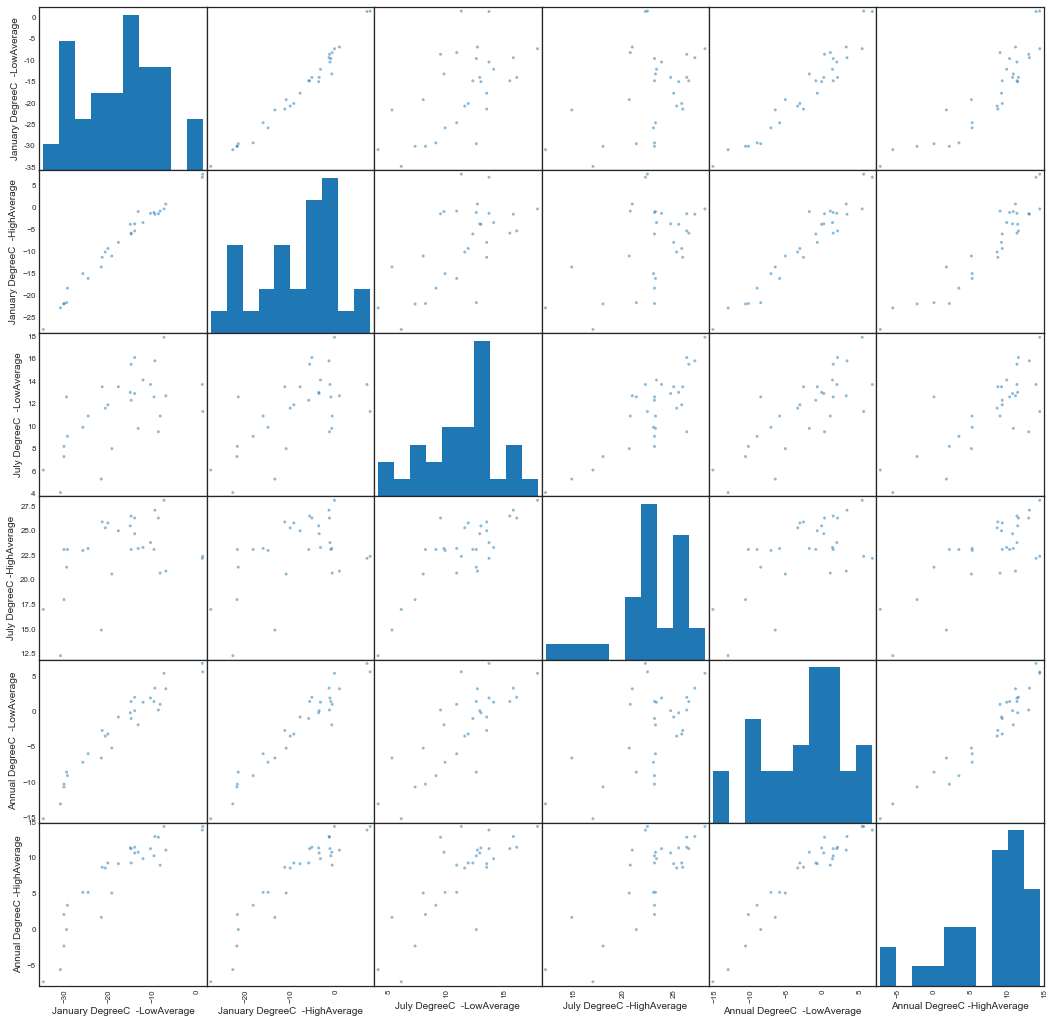

In [36]:
DF3 = DF2[['January DegreeC  -LowAverage','January DegreeC  -HighAverage','July DegreeC  -LowAverage', 'July DegreeC -HighAverage','Annual DegreeC  -LowAverage', 'Annual DegreeC -HighAverage',]]
pd.plotting.scatter_matrix(DF3, alpha=0.5, figsize=(18,18));

In [37]:
titre1=DF3.corr()
titre1

,January DegreeC -LowAverage,January DegreeC -HighAverage,July DegreeC -LowAverage,July DegreeC -HighAverage,Annual DegreeC -LowAverage,Annual DegreeC -HighAverage
January DegreeC -LowAverage,1.000000,0.986341,0.598462,0.432188,0.959537,0.887340
January DegreeC -HighAverage,0.986341,1.000000,0.626303,0.499479,0.965610,0.928835
July DegreeC -LowAverage,0.598462,0.626303,1.000000,0.820351,0.786183,0.780423
July DegreeC -HighAverage,0.432188,0.499479,0.820351,1.000000,0.610975,0.769182
Annual DegreeC -LowAverage,0.959537,0.965610,0.786183,0.610975,1.000000,0.952283
Annual DegreeC -HighAverage,0.887340,0.928835,0.780423,0.769182,0.952283,1.000000


#### It seems they are all linearly related. we could choose all of them as dependent variables then make a model per variable but it takes time and the result probably will be very closed. these two variables have  big correlation with the others : «'Annual DegreeC -LowAverage'» and «'Annual DegreeC -HighAverage'»
#### for now we continue with «'Annual DegreeC -LowAverage'» as our first dependent variable.I would like to add the «'Frost-free days'» as an important indicator, in the eye of an human ,to our analyzis. 

In [38]:
DF4 = DF2[['Latitude (N)', 'Longitude (W)', 'Elevation (m)', 'Annual DegreeC  -LowAverage','Frost-free days']]
DF4.head()

,Latitude (N),Longitude (W),Elevation (m),Annual DegreeC -LowAverage,Frost-free days
0,64.29889,-96.07778,19,-15.2,65
1,51.11389,-114.02028,1084,-1.9,117
2,46.28861,-63.12861,49,1.3,153
3,58.73917,-94.06639,29,-10.7,87
4,64.04306,-139.12778,370,-10.3,70


### 6.2 regression models

<div class="alert alert-block alert-warning">
<b>  </b> 
<ul>we  will have two individual model. the independent variables for both are the same:
    <li>'Latitude (N)',</li> 
    <li>'Longitude (W)'</li>
    <li>'Elevation (m)' </li>
<ul> but there is two different dependent variables ( one for each model)
    <li>'Annual DegreeC  -LowAverage' </li>
    <li>'Frost-free days'</li>
</ul>
 
</ul>


</div>


first step is splitting data set then normalize train section

In [39]:
X = DF4[['Latitude (N)', 'Longitude (W)', 'Elevation (m)']]
y_temp = DF4[['Annual DegreeC  -LowAverage']]
y_frost = DF4[['Frost-free days']]

In [40]:
X_train_TMP, X_test_TMP, y_train_TMP, y_test_TMP = train_test_split( X, y_temp, test_size=0.2, random_state=7)
X_train_FROST, X_test_FROST, y_train_FROST, y_test_FROST = train_test_split( X, y_frost, test_size=0.2, random_state=9)

In [41]:
X_train_TMP = preprocessing.StandardScaler().fit(X_train_TMP).transform(X_train_TMP.astype(float))
y_train_TMP = preprocessing.StandardScaler().fit(y_train_TMP).transform(y_train_TMP.astype(float))

X_train_FROST = preprocessing.StandardScaler().fit(X_train_FROST).transform(X_train_FROST.astype(float))
y_train_FROST = preprocessing.StandardScaler().fit(y_train_FROST).transform(y_train_FROST.astype(float))


X_test_TMP = preprocessing.StandardScaler().fit(X_test_TMP).transform(X_test_TMP.astype(float))
y_test_TMP = preprocessing.StandardScaler().fit(y_test_TMP).transform(y_test_TMP.astype(float))

X_test_FROST = preprocessing.StandardScaler().fit(X_test_FROST).transform(X_test_FROST.astype(float))
y_test_FROST = preprocessing.StandardScaler().fit(y_test_FROST).transform(y_test_FROST.astype(float))


<ul>
    <b> 6.2.1 </b> 'Annual DegreeC  -LowAverage'
</ul>


In [42]:
Reg_TMP = linear_model.LinearRegression()
Reg_TMP.fit (X_train_TMP, y_train_TMP)
# The coefficients
print ('Coefficients: ', Reg_TMP.coef_)

Coefficients:  [[-1.07982728 -0.39970171 -0.10945175]]


In [43]:
y_hat_TMP= Reg_TMP.predict(X_test_TMP)
X_test_TMP = np.asanyarray(X_test_TMP)
y_test_TMP = np.asanyarray(y_test_TMP)
print("Residual sum of squares: %.2f"
      % np.mean((y_hat_TMP - y_test_TMP) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % Reg_TMP.score(X_test_TMP, y_test_TMP))

Residual sum of squares: 0.24
Variance score: 0.76


In [44]:
metrics.r2_score(y_hat_TMP, y_test_TMP)

0.6066541857468878

Scores are not very good, specially R2 score .  there is correlation but not enough to be reliable for predicting 

<ul>
    <b> 6.2.2 </b>forcast of  'Frost-free days'
</ul>

In [45]:
Reg_FROST = linear_model.LinearRegression()
Reg_FROST.fit (X_train_FROST, y_train_FROST)
# The coefficients
print ('Coefficients: ', Reg_FROST.coef_)

Coefficients:  [[-0.97244301 -0.47387296 -0.46361122]]


In [46]:
y_hat_FROST= Reg_FROST.predict(X_test_FROST)
X_test_FROST = np.asanyarray(X_test_FROST)
y_test_FROST = np.asanyarray(y_test_FROST)
print("Residual sum of squares: %.2f"
      % np.mean((y_hat_FROST - y_test_FROST) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % Reg_FROST.score(X_test_FROST, y_test_FROST))

Residual sum of squares: 0.24
Variance score: 0.76


In [47]:
metrics.r2_score(y_hat_FROST, y_test_FROST)

0.7451418653829405

### Here  we have better score,but not good enough yet.

#### We try to use a little visualisation to find some clues.

,January DegreeC -LowAverage,January DegreeC -HighAverage,July DegreeC -LowAverage,July DegreeC -HighAverage,Annual DegreeC -LowAverage,Annual DegreeC -HighAverage
January DegreeC -LowAverage,1.000000,0.986341,0.598462,0.432188,0.959537,0.887340
January DegreeC -HighAverage,0.986341,1.000000,0.626303,0.499479,0.965610,0.928835
July DegreeC -LowAverage,0.598462,0.626303,1.000000,0.820351,0.786183,0.780423
July DegreeC -HighAverage,0.432188,0.499479,0.820351,1.000000,0.610975,0.769182
Annual DegreeC -LowAverage,0.959537,0.965610,0.786183,0.610975,1.000000,0.952283
Annual DegreeC -HighAverage,0.887340,0.928835,0.780423,0.769182,0.952283,1.000000


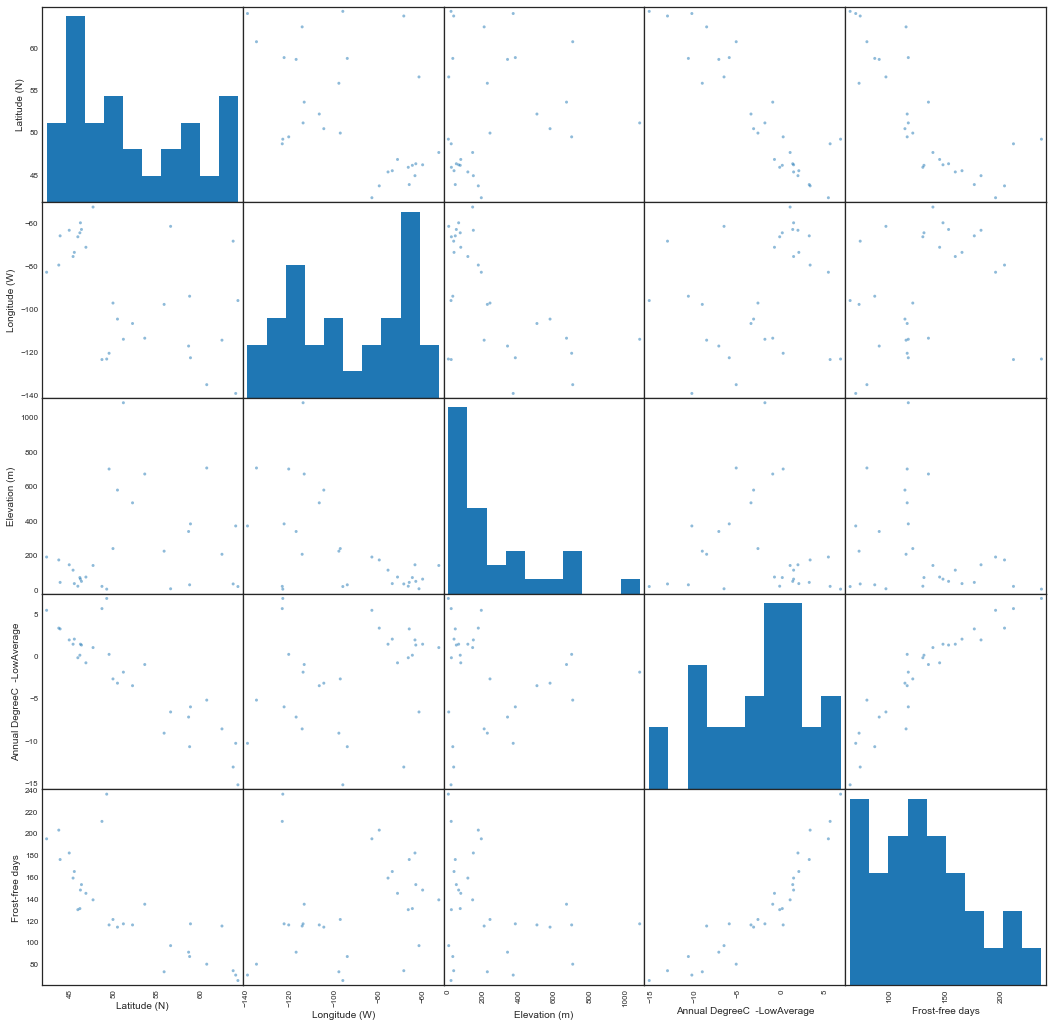

In [48]:

pd.plotting.scatter_matrix(DF4, alpha=0.5, figsize=(18,18));
titre2=DF3.corr()
titre2

### It seems both frost_Free and Annual_Low average have some kind of relation with latitide

In [49]:
Lat = np.asanyarray(DF4[['Latitude (N)']])
LowAv =np.asanyarray(DF4[['Annual DegreeC  -LowAverage']])
FrostFree =np.asanyarray(DF4[['Frost-free days']])

In [50]:
Lat = preprocessing.StandardScaler().fit(Lat).transform(Lat.astype(float))
LowAv = preprocessing.StandardScaler().fit(LowAv).transform(LowAv.astype(float))
FrostFree = preprocessing.StandardScaler().fit(FrostFree).transform(FrostFree.astype(float))

C:\Users\Client\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [51]:
# just testing how our data are corrolated
print("Lat, LowAv",metrics.r2_score(Lat, LowAv))
print("Lat, FrostFree",metrics.r2_score(Lat, FrostFree))
print("LowAv, FrostFree",metrics.r2_score(LowAv, FrostFree))

Lat, LowAv -2.80327979284278
Lat, FrostFree -2.5694077911390303
LowAv, FrostFree 0.826958531381697


### LowAv and FrostFree are highly corrolated (0.82) so we could just use one of them to make the model with «lat» as independent variable

In [52]:
X_train_TMP3, X_test_TMP3, y_train_TMP3, y_test_TMP3 = train_test_split( Lat, LowAv, test_size=0.2, random_state=11)
#X_train_FROST3, X_test_FROST3, y_train_FROST3, y_test_FROST3 = train_test_split( Lat, FrostFree, test_size=0.2, random_state=15)

In [53]:
Reg_TMP3 = linear_model.LinearRegression()
Reg_TMP3.fit (X_train_TMP3, y_train_TMP3)
# The coefficients
print ('Coefficients: ', Reg_TMP3.coef_, 'with intercept of ',Reg_TMP3.intercept_ )
#Reg_TMP3

Coefficients:  [[-0.89941192]] with intercept of  [0.01760437]


In [54]:
y_hat_TMP3= Reg_TMP3.predict(X_test_TMP3)
X_test_TMP3 = np.asanyarray(X_test_TMP3)
y_test_TMP3 = np.asanyarray(y_test_TMP3)
print("Residual sum of squares: %.2f"
      % np.mean((y_hat_TMP3 - y_test_TMP3) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % Reg_TMP3.score(X_test_TMP3, y_test_TMP3))

Residual sum of squares: 0.09
Variance score: 0.89


In [55]:
metrics.r2_score(y_hat_TMP3, y_test_TMP3)

0.8735988297984665

## Conclusion of phase II:
### We could see that the «Average minmum temperature» is somehow predictable by linear regression on  «latitude» as independent variable
<Li>Coefficients:  [[-0.89941192]] with intercept of  [0.01760437]</Li>
<Li>Variance score: 0.89</Li>
 <b> $\color{red}{\text{Important: }}$   </b> pay attention that <b> coefficient and intercept </b> are for NORMALIZED DATA , so you need to do re-scale  coefficient and intercept  before applying on raw data. however , the score stay the same for this model with both normalized and raw data  

# <b> $\color{brown}{\text{Part 2: FourSquare Venues Aspects }}$   </b>


# <b> $\color{green}{\text{ Phase III: }}$   </b> 
### <b> $\color{lightgreen}{\text{Define life comfort indicator and Clustering regarding FourSquare venues  }}$   </b> 
##  $\color{red}{\text{Section 7: Clustering regarding top venues}}$  
### 7.1 find a life style indicator

In [511]:

df_30_Downtown = pd.read_csv('https://raw.githubusercontent.com/babakkz/Capstone_Coursera/master/30_Downtown_Altitude_v2.csv',index_col=0)
#https://github.com/babakkz/Capstone_Coursera/tree/master

In [512]:
#df_30_Downtown.drop(columns='Unnamed: 4',inplace=True)
df_30_Downtown.reset_index(inplace=True)
df_30_Downtown.head()

,Location,Region,Downtown Latitude (N),Downtown Longitude (W)
0,Baker Lake,NU,64.319224,-96.029856
1,Calgary,AB,51.048967,-114.067123
2,Charlottetown,PE,46.234212,-63.127499
3,Churchill,MB,58.770010,-94.165489
4,Dawson Creek,BC,55.757065,-120.234002


In [513]:
df_30_Downtown.columns

Index(['Location', 'Region', 'Downtown Latitude (N)',
       'Downtown Longitude (W)'],
      dtype='object')

#### Define Foursquare Credentials and Version

In [514]:
#ACCESS_TOKEN = 'FS5ZX5N2BQAAZHFZTJ0TDJIBJ5XYL5NPXKK02FRF5XQECE12' 

#CLIENT_ID = 'your-client-ID' # your Foursquare ID
#CLIENT_SECRET = 'your-client-secret' # your Foursquare Secret
CLIENT_ID = 'SQ1LN5VJHXHIHEV0Q1XSWDWGP3QIC23AFVPQDKR2QDMYEQOB' 
CLIENT_SECRET = 'VKOGOJWYG0LHHQ00OWIICWYNIGQ1EJIEMJO4XCAH01DDFOAF' 

VERSION = '20180605' # Foursquare API version
LIMIT = 10000 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SQ1LN5VJHXHIHEV0Q1XSWDWGP3QIC23AFVPQDKR2QDMYEQOB
CLIENT_SECRET:VKOGOJWYG0LHHQ00OWIICWYNIGQ1EJIEMJO4XCAH01DDFOAF


Now, let's get the top 100 venues that are in Marble Hill within a radius of 500 meters.
First, let's create the GET request URL. Name your URL url.

In [515]:
def getNearbyVenues(names, latitudes, longitudes, radius=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Location', 
                  'Location Latitude', 
                  'Location Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [516]:
df_30_Downtown_venues = getNearbyVenues(names=df_30_Downtown['Location'],
                                   latitudes=df_30_Downtown['Downtown Latitude (N)'],
                                   longitudes=df_30_Downtown['Downtown Longitude (W)']
                                  )


Baker Lake
Calgary
Charlottetown
Churchill
Dawson Creek
Edmonton
Fort Nelson
Fredericton
Halifax
High Level
Iqaluit
Moncton
Montreal
Nain
Ottawa
Princeton
Quebec City
Regina
Saskatoon
St. John's
Sydney
Thompson
Toronto
Vancouver
Victoria
Whitehorse
Windsor
Winnipeg
Yarmouth
Yellowknife


#### as limited version of access to any API most of time have some strange behavior ,  instead of using a loop , I prefer execute the code for radius one by one to check them step by step . then I will combine the results is a unique csv file as my data source in next step. so inactive codes in next cells was used to produce this file. I put this file on GitHub ( )

In [517]:
#df_30_Downtown_venues_V10000_r100 = df_30_Downtown_venues

In [518]:
#df_30_Downtown_venues_V10000_r200 = df_30_Downtown_venues

In [519]:
#df_30_Downtown_venues_V10000_r300 = df_30_Downtown_venues

In [520]:
#df_30_Downtown_venues_V10000_r400 = df_30_Downtown_venues

In [521]:
#df_30_Downtown_venues_V10000_r500 = df_30_Downtown_venues

In [522]:
#df_30_Downtown_venues_V10000_r1000 = df_30_Downtown_venues

In [523]:
#df_30_Downtown_venues_V10000_r100['Radius Category']=100
#df_30_Downtown_venues_V10000_r200['Radius Category']=200
#df_30_Downtown_venues_V10000_r300['Radius Category']=300
#df_30_Downtown_venues_V10000_r400['Radius Category']=400
#df_30_Downtown_venues_V10000_r500['Radius Category']=500
#df_30_Downtown_venues_V10000_r1000['Radius Category']=1000

In [524]:
#df_30_Downtown_venues_V10000_r100.to_csv(r'C:\B_GitHub_Local_Files\r100.csv',index=False)
#df_30_Downtown_venues_V10000_r200.to_csv(r'C:\B_GitHub_Local_Files\r200.csv',index=False)
#df_30_Downtown_venues_V10000_r300.to_csv(r'C:\B_GitHub_Local_Files\r300.csv',index=False)
#df_30_Downtown_venues_V10000_r400.to_csv(r'C:\B_GitHub_Local_Files\r400.csv',index=False)
#df_30_Downtown_venues_V10000_r500.to_csv(r'C:\B_GitHub_Local_Files\r500.csv',index=False)
#df_30_Downtown_venues_V10000_r1000.to_csv(r'C:\B_GitHub_Local_Files\r1000.csv',index=False)


In [525]:
#frames = [df_30_Downtown_venues_V10000_r100, 
#          df_30_Downtown_venues_V10000_r200, 
#          df_30_Downtown_venues_V10000_r300,
#          df_30_Downtown_venues_V10000_r400,
#          df_30_Downtown_venues_V10000_r500,
#          df_30_Downtown_venues_V10000_r1000]

#VenueByRadiusCategory = pd.concat(frames)

#VenueByRadiusCategory.shape

In [526]:
#VenueByRadiusCategory.to_csv(r'C:\B_GitHub_Local_Files\rAll.csv',index=False)

In [527]:
#print(df_30_Downtown_venues_V10000_r100.shape)
#print( df_30_Downtown_venues_V10000_r200.shape)
#print( df_30_Downtown_venues_V10000_r300.shape)
#print(df_30_Downtown_venues_V10000_r400.shape )
#print(df_30_Downtown_venues_V10000_r500.shape )
#print(df_30_Downtown_venues_V10000_r1000.shape)

In [528]:
Venue_In_CategoricalRange = pd.read_csv('https://raw.githubusercontent.com/babakkz/Capstone_Coursera/master/Venue_In_CategoricalRange_of_1000.csv')
#https://github.com/babakkz/Capstone_Coursera/tree/master

In [529]:
Venue_In_CategoricalRange.head()

,Location,Location Latitude,Location Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Radius Category
0,Calgary,51.048967,-114.067123,Over Easy Breakfast,51.048561,-114.065917,Breakfast Spot,100
1,Calgary,51.048967,-114.067123,Monogram Coffee,51.049165,-114.067333,Coffee Shop,100
2,Calgary,51.048967,-114.067123,Starbucks,51.048256,-114.067061,Coffee Shop,100
3,Calgary,51.048967,-114.067123,Booster Juice,51.048725,-114.068340,Juice Bar,100
4,Calgary,51.048967,-114.067123,Tim Hortons,51.049323,-114.068079,Coffee Shop,100


### Remove duplicated venues refering altitudes , venue name and city. ( of cours city is related to altitude but I preserve it as checking point for possible errors in data).

In [530]:
DuplicateSubset=['Location',  'Venue', 'Venue Latitude', 'Venue Longitude']
Unique_Venue_In_CategoricalRangedf=Venue_In_CategoricalRange.drop_duplicates(subset=DuplicateSubset) #, keep='last')

In [531]:
Unique_Venue_In_CategoricalRangedf.shape

(2065, 8)

#### This dataframe contains the venues for radius catogory of 100,200,300,400,500,1000
#### we need to pivot on Location and Radius Category for count of Venues

In [532]:
VenueScore= Unique_Venue_In_CategoricalRangedf.pivot_table( index = ['Location'], columns=['Radius Category'], values="Venue Category", aggfunc='count')
VenueScore['VenueScore']=VenueScore.sum(axis=1)
VenueScore.sort_values(by='VenueScore', ascending = False, inplace = True) 
VenueScore

Radius Category,100,200,300,400,500,1000,VenueScore
Location,,,,,,,
Montreal,7.0,21.0,20.0,23.0,35.0,68.0,174.0
Toronto,21.0,23.0,22.0,33.0,17.0,56.0,172.0
Vancouver,12.0,17.0,22.0,15.0,30.0,55.0,151.0
Edmonton,NaN,34.0,27.0,39.0,12.0,35.0,147.0
Ottawa,8.0,10.0,29.0,17.0,23.0,59.0,146.0
Quebec City,10.0,12.0,31.0,7.0,20.0,64.0,144.0
Halifax,10.0,24.0,23.0,38.0,19.0,26.0,140.0
Victoria,6.0,25.0,50.0,26.0,15.0,6.0,128.0
Winnipeg,2.0,9.0,24.0,17.0,18.0,55.0,125.0


In [533]:
LifeConfortIndex = pd.DataFrame(VenueScore['VenueScore'])
LifeConfortIndex = LifeConfortIndex.reset_index()
LifeConfortIndex['OneScaleddScore'] = LifeConfortIndex['VenueScore']/max(LifeConfortIndex['VenueScore'])
LifeConfortIndex

,Location,VenueScore,OneScaleddScore
0,Montreal,174.0,1.000000
1,Toronto,172.0,0.988506
2,Vancouver,151.0,0.867816
3,Edmonton,147.0,0.844828
4,Ottawa,146.0,0.839080
5,Quebec City,144.0,0.827586
6,Halifax,140.0,0.804598
7,Victoria,128.0,0.735632
8,Winnipeg,125.0,0.718391
9,Calgary,108.0,0.620690


In [534]:
print("Mean: ",LifeConfortIndex['VenueScore'].mean()) 
print("Standard Variation",LifeConfortIndex['VenueScore'].std())
print("Median",LifeConfortIndex['VenueScore'].median())

Mean:  68.83333333333333
Standard Variation 59.18066047884768
Median 57.0


In [535]:
OverMedianCities=pd.DataFrame(LifeConfortIndex[LifeConfortIndex['VenueScore']>=LifeConfortIndex['VenueScore'].median()]['Location'])
TopConfortableCities = pd.DataFrame(LifeConfortIndex[LifeConfortIndex['OneScaleddScore']>=0.8]['Location'])
#OverMedianCities
TopConfortableCities

,Location
0,Montreal
1,Toronto
2,Vancouver
3,Edmonton
4,Ottawa
5,Quebec City
6,Halifax


#### we have 16 cities above median, but we are interested more in best citis for that,
#### We choose the cities with the maximum «Life confort Index»  better than 80% as the top cities, in which,
#### we could find a varity of services. we have total of 7 cities in this category


### 7.2 Clustering cities by top important Venues
#### in this section we are going to work on Unique_Venue_In_CategoricalRangedf to cluster cities by venue

In [536]:
Unique_Venue_In_CategoricalRangedf.head()
df_UV = Unique_Venue_In_CategoricalRangedf
#df_UV.groupby('Location').count()
print('There are {} uniques categories.'.format(len(df_UV['Venue Category'].unique())))

There are 245 uniques categories.


In [537]:
# one hot encoding
df_UVoneHot = pd.get_dummies(df_UV[['Venue Category']], prefix="", prefix_sep="")
print(df_UVoneHot.shape)
df_UVoneHot.head(1)

(2065, 245)


,Adult Boutique,Airport,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,...,Video Game Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [538]:
# add neighborhood column back to dataframe
df_UVoneHot['Location'] = df_UV['Location'] 
print(df_UVoneHot.shape)
df_UVoneHot.head()

(2065, 246)


,Adult Boutique,Airport,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,...,Vietnamese Restaurant,Warehouse Store,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Location
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Calgary
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Calgary
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Calgary
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Calgary
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Calgary


In [539]:
# move neighborhood column to the first column
fixed_columns = [df_UVoneHot.columns[-1]] + list(df_UVoneHot.columns[:-1])
df_UVoneHot = df_UVoneHot[fixed_columns]
print(df_UVoneHot.shape)
df_UVoneHot.head()

(2065, 246)


,Location,Adult Boutique,Airport,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Video Game Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Calgary,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Calgary,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Calgary,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Calgary,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Calgary,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [540]:
#df_UV_grouped_sum = df_UVoneHot.groupby('Location').sum().reset_index()
df_UV_grouped_mean = df_UVoneHot.groupby('Location').mean().reset_index()
print(df_UV_grouped_mean.shape)
df_UV_grouped_mean.head()

(30, 246)


,Location,Adult Boutique,Airport,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Video Game Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Baker Lake,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
1,Calgary,0.0,0.0,0.018519,0.0,0.009259,0.0,0.0,0.0,0.0,...,0.0,0.018519,0.0,0.0,0.0,0.0,0.009259,0.0,0.0,0.018519
2,Charlottetown,0.0,0.0,0.029412,0.0,0.014706,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
3,Churchill,0.0,0.0,0.000000,0.0,0.000000,0.1,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
4,Dawson Creek,0.0,0.0,0.043478,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000


Let's print each city along with the top 10 most common venues

In [541]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [542]:
num_top_venues = 30

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
# it is equivalent of  for i = 3 put «st»,«nd» and «rd» after the number then «th» ... 1st,2nd,3rd,4th,5th...
columns = ['Location']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
cities_venues_sorted = pd.DataFrame(columns=columns)
cities_venues_sorted['Location'] = df_UV_grouped_mean['Location']

for ind in np.arange(df_UV_grouped_mean.shape[0]):
    cities_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df_UV_grouped_mean.iloc[ind, :], num_top_venues)

cities_venues_sorted.head()


,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue
0,Baker Lake,Hotel,Fast Food Restaurant,Yoga Studio,Event Space,Gaming Cafe,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,...,Donut Shop,Dog Run,Dive Bar,Distribution Center,Discount Store,Diner,Dim Sum Restaurant,Dessert Shop,Department Store,Deli / Bodega
1,Calgary,Hotel,Coffee Shop,Restaurant,Pub,Steakhouse,Bar,Cocktail Bar,Café,Brazilian Restaurant,...,Library,Shoe Store,Discount Store,Noodle House,Middle Eastern Restaurant,Museum,Scenic Lookout,Sandwich Place,Department Store,Light Rail Station
2,Charlottetown,Coffee Shop,Hotel,Seafood Restaurant,Pub,Restaurant,History Museum,Sushi Restaurant,Ice Cream Shop,Gastropub,...,Lounge,Breakfast Spot,Chinese Restaurant,Steakhouse,Sandwich Place,Italian Restaurant,Performing Arts Venue,Grocery Store,Art Gallery,Tea Room
3,Churchill,Inn,Hotel,Gastropub,Harbor / Marina,Bed & Breakfast,Coffee Shop,Train Station,Restaurant,Beach,...,Fish & Chips Shop,Fast Food Restaurant,Dim Sum Restaurant,Distribution Center,Falafel Restaurant,Event Space,Ethiopian Restaurant,Diner,Gaming Cafe,Discount Store
4,Dawson Creek,Coffee Shop,Café,Historic Site,Burger Joint,Grocery Store,Convenience Store,Restaurant,Sandwich Place,Fast Food Restaurant,...,Dim Sum Restaurant,Diner,Food & Drink Shop,Food,Fish & Chips Shop,Hotel Bar,Farmers Market,Falafel Restaurant,IT Services,Event Space


In [543]:
# set different k to make a clusters matrix
kclusters = 30

labelKmeans=pd.DataFrame([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
sse2=[]
silhouette_coefficients2 = []
for n in range(2,kclusters-1):
    # run k-means clustering
    kmeans = KMeans(n_clusters=n, random_state=0).fit(city_grouped_clustering)

    x = kmeans.labels_
    x = np.sort(x)
    cName = str(n) # "Kc=" + str(n)
    labelKmeanstemp = pd.DataFrame(kmeans.labels_ , columns=[cName])
    labelKmeans = pd.concat([labelKmeans,labelKmeanstemp], axis=1, join='inner')
    score = silhouette_score(city_grouped_clustering, kmeans.labels_)
    #print(kmeans.inertia_)
    sse2.append(kmeans.inertia_)
    silhouette_coefficients2.append(score)
labelKmeans.drop(columns=0, axis=1, inplace=True)
print(" To be capble of using «Silhouette_coefficients» we must use k=2 to k=28 so \n there is 27 active columns for k")
print("\n \n labelKmeans (Labe for Clustering ) \n",labelKmeans)
print("\n \n SSE : \n \n",sse)
print("\n \n Silhouette_coefficients (SSE considering centroide distances too ) \n \n",silhouette_coefficients)


 To be capble of using «Silhouette_coefficients» we must use k=2 to k=28 so 
 there is 27 active columns for k

 
 labelKmeans (Labe for Clustering ) 
     2  3  4  5  6  7  8  9  10  11 ...  19  20  21  22  23  24  25  26  27  28
0   1  2  0  2  3  3  3  1   0   2 ...   3   1   1   1   1   1   2   2   4   2
1   0  0  3  1  0  0  0  2   3   0 ...   5  18  18   6  16   0  17  11  14  11
2   0  0  3  1  0  0  0  2   3   0 ...  18   3  20  18  19  16  20  23  20  23
3   0  0  3  1  0  0  0  2   1   8 ...   6   9   9   7  10   8   9   6   8   6
4   0  0  3  1  0  0  0  2   3   0 ...  11  13  15  13  12  12  13  17  13  17
5   0  0  3  1  0  0  0  2   3   0 ...  13   6  13  21  20  15   6  14   7  14
6   0  0  1  4  2  2  6  8   5   3 ...   2   4   2   5   4   6   5   7   3   7
7   0  0  3  1  0  0  0  2   3   0 ...  13   0  19  16   0  21  12  19  17  19
8   0  0  3  1  0  0  0  2   3   0 ...   5  18  18   6  16   0  17  11  14  11
9   0  0  1  4  4  6  6  5   4   9 ...   7   5   5   4   7

The elbow point is at k =  12


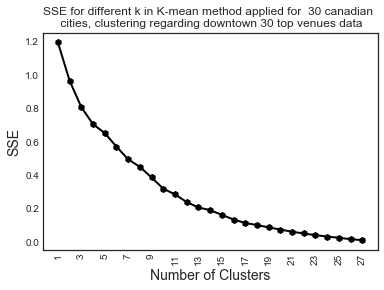

In [576]:
kl2 = KneeLocator(
   range(1, kclusters-2), sse2, curve="convex", direction="decreasing"
    )

print("The elbow point is at k = ",kl2.elbow)

# https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
plt.style.use("seaborn-white")
plt.plot(range(1, kclusters-2), sse2, color='black',linewidth=2, marker='h')
plt.xticks(range(1, kclusters-2,2),fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Number of Clusters",fontsize=14)
plt.ylabel("SSE",fontsize=14)
plt.xticks(rotation=90)
plt.title("SSE for different k in K-mean method applied for  30 canadian \n cities, clustering regarding downtown 30 top venues data")

plt.show()






In [545]:
unique, counts = np.unique(labelKmeans [str(kl2.elbow)], return_counts=True)
print(dict(zip(unique, counts)))

city_grouped_clustered  = pd.concat([df,pd.DataFrame(labelKmeans [str(kl2.elbow)])], axis=1)
city_grouped_clustered.rename(columns={str(kl2.elbow):'Cluster Number'}, inplace= True)
city_grouped_clustered.head()


{0: 1, 1: 15, 2: 1, 3: 1, 4: 1, 5: 2, 6: 1, 7: 1, 8: 1, 9: 1, 10: 4, 11: 1}


,Location,Region,Weather station,Latitude (N),Longitude (W),Elevation (m),January DegreeC -LowRecord,January DegreeC -LowAverage,January DegreeC -HighAverage,January DegreeC -HighRecord,...,Annual DegreeC -HighAverage,Annual DegreeC -HighRecord,Days >30Degree,Days >20Degree,Frosts,Max temp <0Degree,Days <-10Degree,Days <?20Degree,Frost-free days,Cluster Number
0,Baker Lake,NU,YBK,64.29889,-96.07778,19,-50.6,-34.8,-27.7,-27.7,...,-7.3,33.6,0.2,13.1,270.5,225.5,206.3,158.2,65,0
1,Calgary,AB,YYC,51.11389,-114.02028,1084,-44.4,-13.2,-0.9,17.6,...,10.8,36.1,5.1,87.2,194.4,59.3,71.3,21.7,117,1
2,Charlottetown,PE,YYG,46.28861,-63.12861,49,-30.5,-12.1,-3.4,15.1,...,9.9,34.4,0.9,79.3,160.2,72.6,54.6,6.5,153,1
3,Churchill,MB,YYQ,58.73917,-94.06639,29,-45.0,-30.1,-21.9,1.7,...,-2.3,36.9,1.1,28.0,247.5,193.7,171.0,117.2,87,3
4,Dawson Creek,BC,YDA,64.04306,-139.12778,370,-53.8,-30.1,-21.8,9.7,...,2.1,34.7,2.6,62.1,243.7,156.9,162.4,104.1,70,1


In [546]:
df_30_Downtown.head(1)

,Location,Region,Downtown Latitude (N),Downtown Longitude (W)
0,Baker Lake,NU,64.319224,-96.029856


In [547]:
city_grouped_clustered[['Downtown Latitude (N)','Downtown Longitude (W)']]=df_30_Downtown[['Downtown Latitude (N)','Downtown Longitude (W)']]
city_grouped_clustered[['Location','Latitude (N)','Longitude (W)','Downtown Latitude (N)','Downtown Longitude (W)']].head()
# the only doubtable is 
#Dawson Creek	64.04306	-139.12778	55.757065	-120.234002
#I checked it on google map 
#it is correct the first altitude is for airport of cities so in this case it is so far from city

,Location,Latitude (N),Longitude (W),Downtown Latitude (N),Downtown Longitude (W)
0,Baker Lake,64.29889,-96.07778,64.319224,-96.029856
1,Calgary,51.11389,-114.02028,51.048967,-114.067123
2,Charlottetown,46.28861,-63.12861,46.234212,-63.127499
3,Churchill,58.73917,-94.06639,58.770010,-94.165489
4,Dawson Creek,64.04306,-139.12778,55.757065,-120.234002


In [548]:
city_grouped_clustered.head()

,Location,Region,Weather station,Latitude (N),Longitude (W),Elevation (m),January DegreeC -LowRecord,January DegreeC -LowAverage,January DegreeC -HighAverage,January DegreeC -HighRecord,...,Days >30Degree,Days >20Degree,Frosts,Max temp <0Degree,Days <-10Degree,Days <?20Degree,Frost-free days,Cluster Number,Downtown Latitude (N),Downtown Longitude (W)
0,Baker Lake,NU,YBK,64.29889,-96.07778,19,-50.6,-34.8,-27.7,-27.7,...,0.2,13.1,270.5,225.5,206.3,158.2,65,0,64.319224,-96.029856
1,Calgary,AB,YYC,51.11389,-114.02028,1084,-44.4,-13.2,-0.9,17.6,...,5.1,87.2,194.4,59.3,71.3,21.7,117,1,51.048967,-114.067123
2,Charlottetown,PE,YYG,46.28861,-63.12861,49,-30.5,-12.1,-3.4,15.1,...,0.9,79.3,160.2,72.6,54.6,6.5,153,1,46.234212,-63.127499
3,Churchill,MB,YYQ,58.73917,-94.06639,29,-45.0,-30.1,-21.9,1.7,...,1.1,28.0,247.5,193.7,171.0,117.2,87,3,58.770010,-94.165489
4,Dawson Creek,BC,YDA,64.04306,-139.12778,370,-53.8,-30.1,-21.8,9.7,...,2.6,62.1,243.7,156.9,162.4,104.1,70,1,55.757065,-120.234002


In [549]:
#https://www.webucator.com/blog/2015/03/python-color-constants-module/
color = ['#000000', '#7FF000', '#51FEC6', '#EAEAEA', '#FFFF00', '#FF3030', '#9B30FF', '#0000FF','#848484','#FFBBFF','#CDAD00','#8B4726']   #, '#00BEF5', '#CE3607','#E6CA69'
city_grouped_clustered['Cluster Color']=city_grouped_clustered['Cluster Number']
ClusterNumber = city_grouped_clustered['Cluster Number'].unique().tolist()
ColorDictionary = {ClusterNumber[i]: color[i] for i in range(len(ClusterNumber))}

#df_TNeib_LL_Color = df_TNeib_LL
#df_TNeib_LL_Color['ColorBorough'] = df_TNeib_LL_Color['Borough']
city_grouped_clustered.replace({"Cluster Color": ColorDictionary}, inplace=True) 
DFC = city_grouped_clustered
DFC.head()

,Location,Region,Weather station,Latitude (N),Longitude (W),Elevation (m),January DegreeC -LowRecord,January DegreeC -LowAverage,January DegreeC -HighAverage,January DegreeC -HighRecord,...,Days >20Degree,Frosts,Max temp <0Degree,Days <-10Degree,Days <?20Degree,Frost-free days,Cluster Number,Downtown Latitude (N),Downtown Longitude (W),Cluster Color
0,Baker Lake,NU,YBK,64.29889,-96.07778,19,-50.6,-34.8,-27.7,-27.7,...,13.1,270.5,225.5,206.3,158.2,65,0,64.319224,-96.029856,#000000
1,Calgary,AB,YYC,51.11389,-114.02028,1084,-44.4,-13.2,-0.9,17.6,...,87.2,194.4,59.3,71.3,21.7,117,1,51.048967,-114.067123,#7FF000
2,Charlottetown,PE,YYG,46.28861,-63.12861,49,-30.5,-12.1,-3.4,15.1,...,79.3,160.2,72.6,54.6,6.5,153,1,46.234212,-63.127499,#7FF000
3,Churchill,MB,YYQ,58.73917,-94.06639,29,-45.0,-30.1,-21.9,1.7,...,28.0,247.5,193.7,171.0,117.2,87,3,58.770010,-94.165489,#51FEC6
4,Dawson Creek,BC,YDA,64.04306,-139.12778,370,-53.8,-30.1,-21.8,9.7,...,62.1,243.7,156.9,162.4,104.1,70,1,55.757065,-120.234002,#7FF000


In [550]:
#DF_Color_Cluster[]
DF_Color_Cluster= city_grouped_clustered[['Cluster Number','Cluster Color']] 
DuplicateSubset2=['Cluster Number','Cluster Color']
DF_Color_ClusterUnique=DF_Color_Cluster.drop_duplicates(subset=DuplicateSubset2) #, keep='last')
DF_Color_ClusterUnique

,Cluster Number,Cluster Color
0,0,#000000
1,1,#7FF000
3,3,#51FEC6
6,4,#EAEAEA
8,10,#FFFF00
9,6,#FF3030
10,8,#9B30FF
13,2,#0000FF
15,9,#848484
20,5,#FFBBFF


In [551]:
address = 'Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

# create map  using latitude and longitude values
map_ = folium.Map(location=[latitude, longitude], zoom_start=3)

# add markers to map
for lat, lng, city,province ,ClusterNumber,colorName in zip(DFC['Downtown Latitude (N)'], DFC['Downtown Longitude (W)'], DFC['Location'],DFC['Region'], DFC['Cluster Number'], DFC['Cluster Color']):
    label = '{}, {},{},{}'.format(city,province ,station,ClusterNumber)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color= 'gray' , # colorName,
        fill=True,
        fill_color = colorName, 
        fill_opacity=1,
        weight =1,
        parse_html=False).add_to(map_)  
        
map_

The geograpical coordinate of Toronto are 61.0666922, -107.9917071.


In [552]:
df_30_Downtown

,Location,Region,Downtown Latitude (N),Downtown Longitude (W)
0,Baker Lake,NU,64.319224,-96.029856
1,Calgary,AB,51.048967,-114.067123
2,Charlottetown,PE,46.234212,-63.127499
3,Churchill,MB,58.770010,-94.165489
4,Dawson Creek,BC,55.757065,-120.234002
5,Edmonton,AB,53.541762,-113.496502
6,Fort Nelson,BC,58.803779,-122.696529
7,Fredericton,NB,45.962307,-66.642358
8,Halifax,NS,44.646946,-63.575615
9,High Level,AB,58.514318,-117.136904


##  $\color{red}{\text{Section 8: Result resume and Conclusion }}$  

### 8.1 Prepare abstract matrix

In [553]:
ConclusionMatrix_LocIndex = df_30_Downtown.set_index('Location')
ConclusionMatrix_LocIndex
df_30_Downtown

,Location,Region,Downtown Latitude (N),Downtown Longitude (W)
0,Baker Lake,NU,64.319224,-96.029856
1,Calgary,AB,51.048967,-114.067123
2,Charlottetown,PE,46.234212,-63.127499
3,Churchill,MB,58.770010,-94.165489
4,Dawson Creek,BC,55.757065,-120.234002
5,Edmonton,AB,53.541762,-113.496502
6,Fort Nelson,BC,58.803779,-122.696529
7,Fredericton,NB,45.962307,-66.642358
8,Halifax,NS,44.646946,-63.575615
9,High Level,AB,58.514318,-117.136904


In [554]:
ConclusionMatrix_LocIndex = df_30_Downtown.set_index('Location')

df_clustered_LocIndex = df_clustered.set_index('Location')
city_grouped_clustered_LocIndex = city_grouped_clustered.set_index('Location')
LifeConfortIndex_LocIndex = LifeConfortIndex.set_index('Location')

#ConclusionMatrix_LocIndex
#df_clustered_LocIndex
#city_grouped_clustered_LocIndex

ConclusionMatrix_LocIndex['Climate Cluster']=df_clustered_LocIndex['Cluster Number']
ConclusionMatrix_LocIndex['Cultural similarity Cluster']=city_grouped_clustered_LocIndex['Cluster Number']

ConclusionMatrix_LocIndex['Number of Venues in downtown (r=1000m)'] = LifeConfortIndex_LocIndex['VenueScore']
ConclusionMatrix_LocIndex['Service accessibility index'] = LifeConfortIndex_LocIndex['OneScaleddScore']



ConclusionMatrix_LocIndex.sort_values(by = ['Service accessibility index'], inplace= True, ascending=False)
ConclusionMatrix_LocIndex

,Region,Downtown Latitude (N),Downtown Longitude (W),Climate Cluster,Cultural similarity Cluster,Number of Venues in downtown (r=1000m),Service accessibility index
Location,,,,,,,
Montreal,QC,45.506276,-73.565902,2,10,174.0,1.000000
Toronto,ON,43.654097,-79.379946,5,1,172.0,0.988506
Vancouver,BC,49.278877,-123.115975,4,10,151.0,0.867816
Edmonton,AB,53.541762,-113.496502,2,1,147.0,0.844828
Ottawa,ON,45.421401,-75.699699,2,1,146.0,0.839080
Quebec City,QC,46.812671,-71.213642,2,10,144.0,0.827586
Halifax,NS,44.646946,-63.575615,7,10,140.0,0.804598
Victoria,BC,48.427104,-123.366767,4,1,128.0,0.735632
Winnipeg,MB,49.892412,-97.140338,0,1,125.0,0.718391


### 8.2 Conclusion

<p style='margin-top:0in;margin-right:0in;margin-bottom:10.0pt;margin-left:0in;line-height:115%;font-size:15px;font-family:"Calibri","sans-serif";text-indent:.25in;'>Objective of this project was to give a big picture of reginal climate and culture in some major Canadian cities. It would be helpful for somebody who has plans to move to a Canadian city or begin a business. &nbsp;</p>
<p style='margin-top:0in;margin-right:0in;margin-bottom:10.0pt;margin-left:0in;line-height:115%;font-size:15px;font-family:"Calibri","sans-serif";text-indent:.25in;'>We checked different aspect to be found how we could achieve our objective:</p>
<ul style="list-style-type: disc;">
    <li>We tried to understand if the climate is predictable by geographical altitudes. The results on regression showed us that is not a very reliable strategy. So we don&rsquo;t use anymore a regression model.</li>
    <li>We did cities clustering by climate data. It worked well and we found that Canadian major cities could be clustered in 8 groups. So, one of our suggested methods is to refer to provided cluster map.</li>
    <li>Then, as the climate is not the only important parameter, getting help of foursquare, we added a life comfort indicator. This indicator reflects the accessibility of services in each city. However, it is not suggested to combine it with our climate clustering because of special importance of this index. If we want to integrate them it would better to prepare a decision matrix which is out of subject in this project.</li>
    <li>And finally, we clustered cities by considering 30 most important venues of each city. This clustering could lead us to understand the social, cultural and even financial resemblance of cities.</li>
</ul>
<p style='margin-top:0in;margin-right:0in;margin-bottom:10.0pt;margin-left:0in;line-height:115%;font-size:15px;font-family:"Calibri","sans-serif";'>So we showed three principal aspects of this subject:</p>
<ul style="list-style-type: disc;">
    <li>Similar cities by climate situation</li>
    <li>Service accessibility index for each city</li>
    <li>Cultural, social and financial resemblance of cities</li>
</ul>
<p style='margin-top:0in;margin-right:0in;margin-bottom:10.0pt;margin-left:0in;line-height:115%;font-size:15px;font-family:"Calibri","sans-serif";text-indent:.25in;'>The subject could be developed by adding analysis on real state subject and assurances (automobile, house, and health) etc.&nbsp; also , it would be a good idea if we have some quantified information about the quality of services that are mentioned  in the current project</p>